In [1]:
import pandas as pd
import numpy as np
from scipy.stats import zscore

# Load your dataset
file_path = r"C:\Users\Elakkiya\Downloads\Horse Race Prediction\races_cleaned.csv"
df = pd.read_csv(file_path)

# Remove duplicates
print("\nNumber of rows before removing duplicates:", len(df))
df_cleaned = df.drop_duplicates()
print("Number of rows after removing duplicates:", len(df_cleaned))

# Function to remove outliers using Z-score method
def remove_outliers_using_zscore(df, column, threshold=3):
    # Calculate the Z-scores for the column (including NaN values)
    z_scores = zscore(df[column], nan_policy='omit')  # Ignore NaNs during Z-score calculation
    # Identify rows where Z-score is above the threshold (both positive and negative)
    return df[np.abs(z_scores) < threshold]

# Get all numerical columns
numerical_columns = df_cleaned.select_dtypes(include=['int64', 'float64']).columns

# Handle outliers for each numerical column using Z-score method
print("\nNumber of rows before removing outliers:", len(df_cleaned))
for col in numerical_columns:
    df_cleaned = remove_outliers_using_zscore(df_cleaned, col)
print("Number of rows after removing outliers:", len(df_cleaned))

# Get unique values in the cleaned numerical columns
unique_values = {}
for col in numerical_columns:
    unique_values[col] = df_cleaned[col].unique()

# Print the unique values for each numerical column
print("\nUnique values in the cleaned numerical columns:")
for col, values in unique_values.items():
    print(f"{col}: {values[:10]}...")  # Printing first 10 unique values for brevity



Number of rows before removing duplicates: 32101
Number of rows after removing duplicates: 32101

Number of rows before removing outliers: 32101
Number of rows after removing outliers: 12024

Unique values in the cleaned numerical columns:
Unnamed: 0: [ 5  8 14 16 17 18 20 24 26 28]...
rid: [110667 114194 127139 130550 131706 133090 138486 140584 148459 149324]...
time: [770 145  70 185 165 100  80 205 105 200]...
band: [72.5 65.  37.5 60.  50.  45.  70.  55.  91.  62.5]...
ages: [5 4 3 2]...
distance: [24  6 21 19 16  5  8 20  7 25]...
winningTime: [410.3  373.3   74.71 333.2  281.4  298.3  334.1  354.8   58.2  377.7 ]...
prize: [24593. 20975.  9463.  9247. 11630. 29511.  7473. 10427. 16722.  6804.]...
metric: [5329.5 4827.  1206.  4223.  3821.  4122.5 1005.  5128.5 3720.5 4725.5]...
ncond: [10  0  1  5 13  4  2  6  7  9]...
class: [2 3 5 4 0 6 7 1]...


In [2]:
# Save the cleaned dataset
output_file_path = "C:/Users/Elakkiya/Downloads/Horse Race Prediction/races_cleaned_final.csv" 
df_cleaned.to_csv(output_file_path, index=False)


In [3]:
import pandas as pd
import numpy as np


# Load the first dataset
file_path_1 = r"C:\Users\Elakkiya\Downloads\Horse Race Prediction\races_cleaned_final.csv"
df1 = pd.read_csv(file_path_1)

# Load the second dataset
file_path_2 = r"C:\Users\Elakkiya\Downloads\Horse Race Prediction\horses_cleaned_final.csv"
df2 = pd.read_csv(file_path_2)

# Function to drop unnamed columns
def drop_unnamed_columns(df):
    unnamed_cols = [col for col in df.columns if "Unnamed" in col]
    df.drop(columns=unnamed_cols, inplace=True)
    return df

# Drop unnamed columns in both datasets
df1 = drop_unnamed_columns(df1)
df2 = drop_unnamed_columns(df2)

# Merge the datasets on 'rid' column
merged_df = pd.merge(df1, df2, on='rid', how='inner')

# Print the first few rows of the merged dataset to verify
print("\nMerged data (first few rows):")
print(merged_df.head())



Merged data (first few rows):
      rid     course  time        date  \
0  114194     exeter   145  2019-01-01   
1  114194     exeter   145  2019-01-01   
2  114194     exeter   145  2019-01-01   
3  114194     exeter   145  2019-01-01   
4  127139  southwell    70  2019-01-01   

                                            title   rclass  band  ages  \
0  david lewis cullompton pipeline handicap chase  Class 3  65.0     5   
1  david lewis cullompton pipeline handicap chase  Class 3  65.0     5   
2  david lewis cullompton pipeline handicap chase  Class 3  65.0     5   
3  david lewis cullompton pipeline handicap chase  Class 3  65.0     5   
4                          betway casino handicap  Class 5  37.5     4   

   distance     condition  ...     TR     OR            father  \
0        24  Good To Soft  ...  112.0  125.0       Irish Wells   
1        24  Good To Soft  ...  105.0  132.0  Robin Des Champs   
2        24  Good To Soft  ...   75.0  119.0           Alflora   
3      

In [4]:
# Save the merged dataset to a new file
output_file_path = r"C:\Users\Elakkiya\Downloads\Horse Race Prediction\merged_horse_race_data.csv"
merged_df.to_csv(output_file_path, index=False)



In [11]:
import pandas as pd
import numpy as np

# Load your dataset
file_path = r"C:\Users\Elakkiya\Downloads\Horse Race Prediction\merged_horse_race_data.csv"
df = pd.read_csv(file_path)

# Function to handle missing values by distributing them evenly
def distribute_missing_values_evenly(df):
    for col in df.columns:
        if df[col].isnull().sum() > 0:  # Check if there are any missing values in the column
            if df[col].dtype == 'object':  # For categorical columns
                non_missing_values = df[col].dropna().values
                missing_count = df[col].isnull().sum()
                fill_values = np.random.choice(non_missing_values, size=missing_count, replace=True)
                df.loc[df[col].isnull(), col] = fill_values
            elif df[col].dtype in ['float64', 'int64']:  # For numerical columns (int and float)
                non_missing_values = df[col].dropna().values
                missing_count = df[col].isnull().sum()
                fill_values = np.random.choice(non_missing_values, size=missing_count, replace=True)
                df.loc[df[col].isnull(), col] = fill_values
    return df

# Print value counts before filling missing values
print("Value counts before filling missing values:\n")
for col in df.columns:
    if df[col].isnull().sum() > 0:
        print(f"Column: {col}")
        print(df[col].value_counts(dropna=False), "\n")

# Handle missing values
df = distribute_missing_values_evenly(df)

# Print value counts after filling missing values
print("Value counts after filling missing values:\n")
for col in df.columns:
    if df[col].isnull().sum() > 0:
        print(f"Column: {col}")
        print(df[col].value_counts(dropna=False), "\n")

# Check for any remaining missing values
print("Remaining missing values:\n", df.isnull().sum())

# Apply the function to fill missing values again to ensure it's fully filled
df = distribute_missing_values_evenly(df)


Value counts before filling missing values:

Column: date
date
NaN           6474
2019-07-27     168
2019-08-03     164
2019-04-27     164
2019-07-06     160
              ... 
2019-03-17       7
2020-03-21       7
2020-03-22       4
2020-02-23       4
2019-02-09       2
Name: count, Length: 448, dtype: int64 

Column: rclass
rclass
Class 6    10755
Class 5    10723
Class 4    10613
Class 3     5182
NaN         4853
Class 2     1399
Class 7      311
Class 1       12
Name: count, dtype: int64 

Column: condition
condition
Standard            10764
Good                10160
Good To Firm         6073
Soft                 4780
Good To Soft         4625
Standard To Slow     3981
Heavy                1585
Yielding              531
Good To Yielding      415
Firm                  346
Fast                  267
Yielding To Soft      185
Soft To Heavy         131
NaN                     5
Name: count, dtype: int64 

Column: dist
dist
NaN       5415
4.50       783
4.00       773
5.50       769
3.5

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler


# Function to drop unnamed columns
def drop_unnamed_columns(df):
    unnamed_cols = [col for col in df.columns if "Unnamed" in col]
    df.drop(columns=unnamed_cols, inplace=True)
    return df

# Drop unnamed columns in the dataset
df = drop_unnamed_columns(df)

# Drop the 'rclass' column if it exists
if 'rclass' in df.columns:
    df = df.drop(columns=['rclass'])

# Function for frequency encoding
def frequency_encoding(df, column):
    freq_encoding = df[column].value_counts() / len(df)
    df[column] = df[column].map(freq_encoding)
    return df

# List of categorical columns to encode
categorical_columns = ['trainerName', 'jockeyName', 'headGear', 'horseName', 'father', 'mother', 'gfather',
                       'course', 'title', 'condition', 'countryCode']

# Apply frequency encoding to categorical columns
for col in categorical_columns:
    if col in df.columns:
        df = frequency_encoding(df, col)

# Feature engineering for date column
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.dayofweek
df['year'] = df['date'].dt.year
# Feature engineering for new features

df['place_rate'] = df['res_place'] / df['runners']
df['average_margin'] = df['margin'] / df['runners']
df['weight_diff'] = df['weightSt'] - df['weightLb']

# Ensure no division by zero errors in the new features by replacing infinities with NaN

df['place_rate'] = df['place_rate'].replace([np.inf, -np.inf], np.nan)
df['average_margin'] = df['average_margin'].replace([np.inf, -np.inf], np.nan)

# Convert relevant columns to numeric
df['dist'] = pd.to_numeric(df['dist'], errors='coerce')
df['log_prize'] = np.log1p(df['prize'])


# Handle missing values by filling them with a method of your choice
df = df.fillna(method='ffill').fillna(method='bfill')

# Apply scaling for numerical columns
numerical_columns = ['place_rate', 'weightSt', 'average_margin', 'weight_diff', 'weightLb', 'age',
                     'position', 'positionL', 'decimalPrice', 'saddle', 'dist', 'isFav', 'RPR', 'TR', 'OR', 
                     'runners', 'margin', 'weight', 'res_win', 'res_place', 'time', 'band', 'ages', 'distance', 
                     'winningTime', 'prize', 'metric', 'ncond', 'class', 'log_prize', 'year', 'month', 'day', 
                     'day_of_week']

# Initialize StandardScaler
scaler = StandardScaler()

# Scale the numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Save the processed dataset to a new file
output_file_path = r"C:\Users\Elakkiya\Downloads\Horse Race Prediction\processed_horse_race_data.csv"
df.to_csv(output_file_path, index=False)

# Print the first few rows of the processed dataset to verify
print("\nProcessed data (first few rows):")
print(df.head())


C:\Users\Elakkiya\AppData\Local\Temp\ipykernel_16684\7791752.py:57: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill').fillna(method='bfill')



Processed data (first few rows):
      rid    course      time       date     title      band      ages  \
0  114194  0.007845 -1.091075 2019-01-01  0.064678  1.477314  2.322312   
1  114194  0.007845 -1.091075 2019-01-01  0.064678  1.477314  2.322312   
2  114194  0.007845 -1.091075 2019-01-01  0.064678  1.477314  2.322312   
3  114194  0.007845 -1.091075 2019-01-01  0.064678  1.477314  2.322312   
4  127139  0.043377 -1.603574 2019-01-01  0.011471 -0.515147  0.726725   

   distance  condition  winningTime  ...  res_win  res_place     month  \
0  2.382135   0.105478     2.148568  ...      0.0   1.903386 -1.504782   
1  2.382135   0.105478     2.148568  ...      0.0  -0.525380 -1.504782   
2  2.382135   0.105478     2.148568  ...      0.0  -0.525380 -1.504782   
3  2.382135   0.105478     2.148568  ...      0.0  -0.525380 -1.504782   
4 -0.860632   0.245576    -0.857192  ...      0.0   1.903386 -1.504782   

        day  day_of_week  place_rate  average_margin  weight_diff      year 

rid               0
course            0
time              0
title             0
band              0
ages              0
distance          0
condition         0
winningTime       0
prize             0
metric            0
countryCode       0
ncond             0
class             0
horseName         0
age               0
saddle            0
decimalPrice      0
isFav             0
trainerName       0
jockeyName        0
position          0
positionL         0
dist              0
weightSt          0
weightLb          0
headGear          0
RPR               0
TR                0
OR                0
father            0
mother            0
gfather           0
runners           0
margin            0
weight            0
res_win           0
res_place         0
month             0
day               0
day_of_week       0
place_rate        0
average_margin    0
weight_diff       0
year              0
log_prize         0
dtype: int64


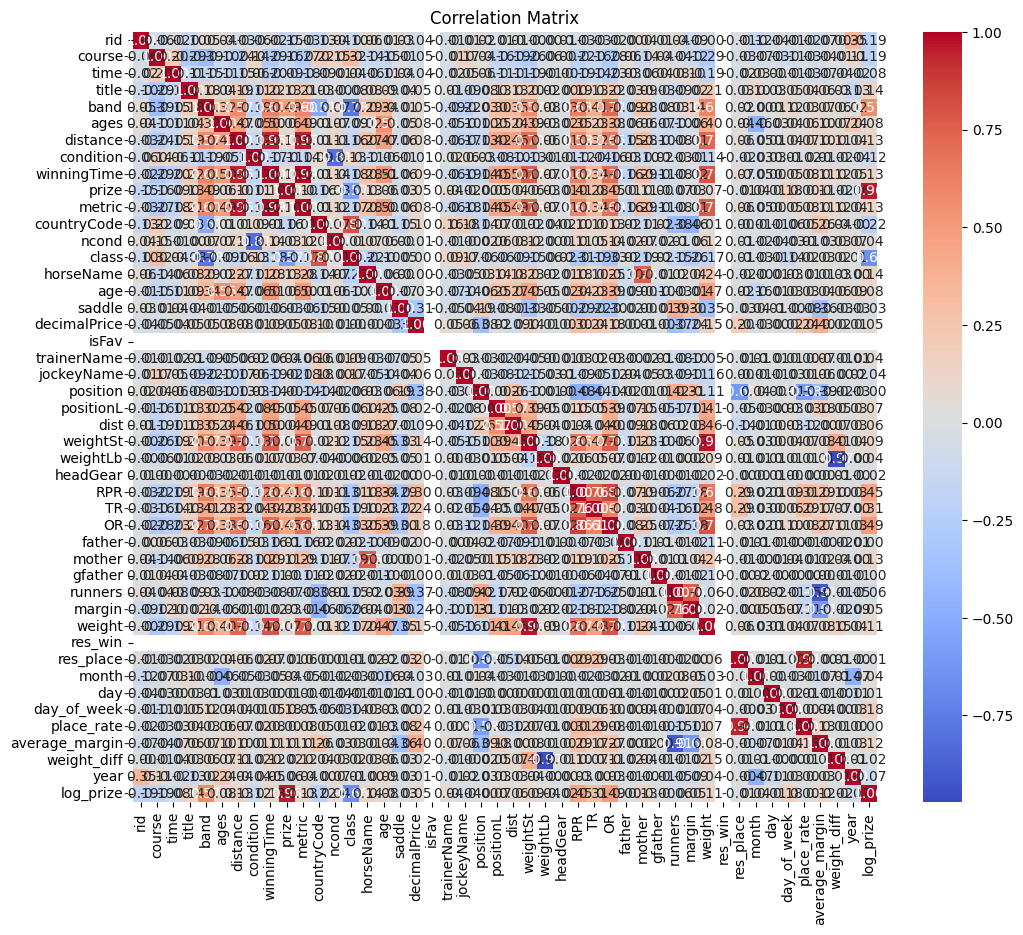

<Figure size 1000x600 with 0 Axes>

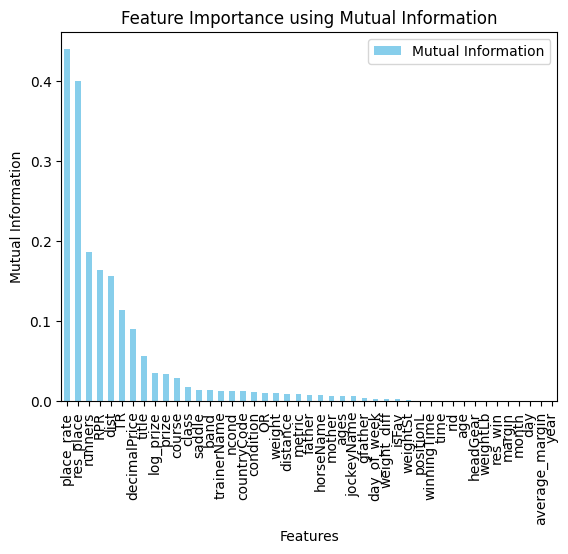

<Figure size 1000x600 with 0 Axes>

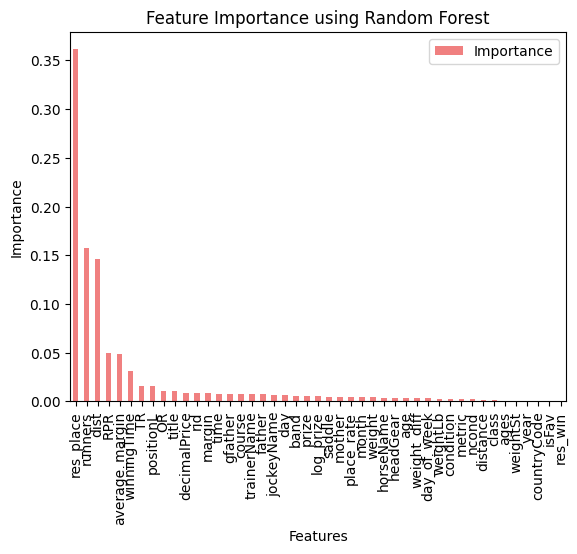

Top 10 Features by Mutual Information:
              Mutual Information
place_rate              0.439827
res_place               0.400714
runners                 0.186858
RPR                     0.163989
dist                    0.156309
TR                      0.114461
decimalPrice            0.089931
title                   0.056375
log_prize               0.035635
prize                   0.034399

Top 10 Features by Random Forest Importance:
                Importance
res_place         0.361218
runners           0.157711
dist              0.146525
RPR               0.049489
average_margin    0.048843
winningTime       0.031312
TR                0.016115
positionL         0.015723
OR                0.011038
title             0.010351


In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Load the processed dataset
file_path = r"C:\Users\Elakkiya\Downloads\Horse Race Prediction\processed_horse_race_data.csv"
df = pd.read_csv(file_path)

# Drop the 'date' column
df = df.drop(columns=['date'])

# Check for missing values
print(df.isnull().sum())

# Correlation Matrix
# We'll compute the correlation for only the numerical columns
correlation_matrix = df.corr()

# Plot the Correlation Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix")
plt.show()

# Feature Importance using Mutual Information
# First, we'll calculate the mutual information between features and the target.
# Assume 'target_column' is the column we are trying to predict (change it accordingly).
target_column = 'position'  # Update this to your actual target column

# Extract numerical columns and the target variable
X = df.drop(columns=[target_column])
y = df[target_column]

# Calculate mutual information
mutual_info = mutual_info_regression(X, y)
mutual_info_df = pd.DataFrame(mutual_info, index=X.columns, columns=['Mutual Information'])
mutual_info_df = mutual_info_df.sort_values(by='Mutual Information', ascending=False)

# Plot mutual information of features
plt.figure(figsize=(10, 6))
mutual_info_df.plot(kind='bar', color='skyblue')
plt.title("Feature Importance using Mutual Information")
plt.xlabel("Features")
plt.ylabel("Mutual Information")
plt.show()

# Feature Importance using Random Forest
# Fit a Random Forest Regressor to find feature importance
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importance
feature_importance = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['Importance'])
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot feature importance from Random Forest
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar', color='lightcoral')
plt.title("Feature Importance using Random Forest")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

# Display the top 10 features by mutual information and Random Forest importance
print("Top 10 Features by Mutual Information:")
print(mutual_info_df.head(10))

print("\nTop 10 Features by Random Forest Importance:")
print(feature_importance.head(10))

# Save the processed DataFrame to a new CSV file
output_file_path = r"C:\Users\Elakkiya\Downloads\Horse Race Prediction\processed_horse_race_data_feature_importance.csv"
df.to_csv(output_file_path, index=False)


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error

# Load the dataset
file_path = r"C:\Users\Elakkiya\Downloads\Horse Race Prediction\processed_horse_race_data_feature_importance.csv"
df = pd.read_csv(file_path)

# Preprocessing: Drop the 'date' column (already done)
df = df.drop(columns=['date'])

# Define feature columns and target variable
X = df.drop(columns=['position'])  # Assuming 'position' is the target
y = df['position']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_mse = mean_squared_error(y_test, y_pred_rf)


# Cross-validation for Random Forest
rf_cv_scores = cross_val_score(rf, X, y, cv=5)
rf_cv_mean = rf_cv_scores.mean()

# Feature Selection using RFE
selector = RFE(rf, n_features_to_select=5)  # Select top 5 features
selector = selector.fit(X_train, y_train)
selected_features = X.columns[selector.support_]

# Hyperparameter Tuning: Grid Search for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

best_rf_model = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)
best_rf_mse = mean_squared_error(y_test, y_pred_best_rf)

# Results
print(f"Random Forest MSE: {rf_mse}")

print(f"Random Forest Cross-validation Mean: {rf_cv_mean}")
print(f"Selected Features (RFE): {selected_features}")
print(f"Best Random Forest Model MSE: {best_rf_mse}")
print(f"Best Hyperparameters for Random Forest: {grid_search_rf.best_params_}")


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso
import pickle

# Load the dataset
file_path = r"C:\Users\Elakkiya\Downloads\Horse Race Prediction\processed_horse_race_data_feature_importance.csv"
df = pd.read_csv(file_path)


# Define feature columns and target variable
X = df.drop(columns=['position'])  # Assuming 'position' is the target
y = df['position']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model: Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# R² Score and Mean Squared Error
rf_r2 = r2_score(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)

# Cross-validation for Random Forest
rf_cv_scores = cross_val_score(rf, X, y, cv=5)
rf_cv_mean = rf_cv_scores.mean()

# Hyperparameter Tuning: Grid Search for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

best_rf_model = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)
best_rf_r2 = r2_score(y_test, y_pred_best_rf)
best_rf_mse = mean_squared_error(y_test, y_pred_best_rf)

# Recursive Feature Elimination (RFE)
selector = RFE(estimator=rf, n_features_to_select=10, step=1)
selector = selector.fit(X_train, y_train)

# Selected Features by RFE
selected_features_rfe = X_train.columns[selector.support_]
print(f"Features selected by RFE: {selected_features_rfe}")

# Regularization (Lasso)
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso_r2 = r2_score(y_test, lasso_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)

# Results
print(f"Random Forest R² Score: {rf_r2}")
print(f"Random Forest MSE: {rf_mse}")
print(f"Random Forest Cross-validation Mean: {rf_cv_mean}")
print(f"Best Random Forest R² Score: {best_rf_r2}")
print(f"Best Random Forest MSE: {best_rf_mse}")
print(f"Best Hyperparameters for Random Forest: {grid_search_rf.best_params_}")
print(f"Lasso R² Score: {lasso_r2}")
print(f"Lasso MSE: {lasso_mse}")

# Save the trained Random Forest model as a pickle file
with open(r"C:\Users\Elakkiya\Downloads\horse_race_rf_model.pkl", 'wb') as f:
    pickle.dump(best_rf_model, f)

print("Model saved as pickle file.")


C:\Users\Elakkiya\Documents\Custom Office Templates\envs\myenv\lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Features selected by RFE: Index(['rid', 'winningTime', 'positionL', 'dist', 'RPR', 'TR', 'runners',
       'res_place', 'average_margin', 'log_prize'],
      dtype='object')
Random Forest R² Score: 0.8238211973758164
Random Forest MSE: 0.1754536089370887
Random Forest Cross-validation Mean: 0.796051424455672
Best Random Forest R² Score: 0.8245859632586869
Best Random Forest MSE: 0.17469199101175958
Best Hyperparameters for Random Forest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Lasso R² Score: 0.5979717934656736
Lasso MSE: 0.4003733631986345
Model saved as pickle file.
